In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

from lcs.agents.xcs import XCS, Configuration
from utils.xcs_utils import *

In [2]:
maze = gym.make('Maze5-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()

This is how maze looks like
<class 'tuple'>
('0', '1', '0', '1', '1', '0', '0', '1')

■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ □ □ □ □ □ $ ■
■ □ □ ■ □ ■ ■ □ ■
■ □ ■ □ A □ □ □ ■
■ □ □ □ ■ ■ □ □ ■
■ □ ■ □ ■ □ □ ■ ■
■ □ ■ □ □ ■ □ □ ■
■ □ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


In [3]:
cfg = Configuration(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_maze_metrics)

df = avg_experiment(maze,
                    cfg,
                    number_of_tests=1,
                    explore_trials=4000,
                    exploit_trials=1000)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 0.055027700000000124, 'population': 108, 'numerosity': 167, 'average_specificity': 7.245508982035928, 'knowledge': 59.589041095890416}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 70, 'reward': 1000.0, 'perf_time': 0.27830520000000547, 'population': 410, 'numerosity': 1600, 'average_specificity': 5.7225, 'knowledge': 98.63013698630137}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 13, 'reward': 1012.782498522416, 'perf_time': 0.030381000000005542, 'population': 426, 'numerosity': 1600, 'average_specificity': 6.3775, 'knowledge': 96.57534246575342}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 37, 'reward': 1000.0031738801285, 'perf_time': 0.18006750000000693, 'population': 423, 'numerosity': 1600, 'average_specificity': 5.80125, 'knowledge': 97.94520547945206}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 44, 'reward': 1000.0002984256316, 'perf_time': 0.1673784999999839, 'population': 404, 'numerosity': 1600, 'average_specificity': 6.54625, 'knowledge': 97.26027397260275}
INFO:lcs.agents.Agent:{'trial': 2000, 'steps_in_trial': 5, 'reward': 1000.0000000000002, 'perf_time': 0.02010

In [4]:
display(df)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,knowledge
trial,,,,,,,
0,100,0.000000e+00,0.055028,108,167,7.245509,59.589041
100,100,1.336087e-12,0.356117,425,1600,6.675000,99.315068
200,29,1.000000e+03,0.110790,384,1600,6.528750,97.945205
300,33,1.000012e+03,0.153194,397,1600,7.879375,95.890411
400,70,1.000000e+03,0.278305,410,1600,5.722500,98.630137
500,16,1.005230e+03,0.057963,410,1600,6.540000,99.315068
600,48,1.000000e+03,0.156724,414,1600,5.796250,97.945205
700,100,1.336087e-12,0.347222,405,1600,6.329375,93.835616
800,13,1.012782e+03,0.030381,426,1600,6.377500,96.575342


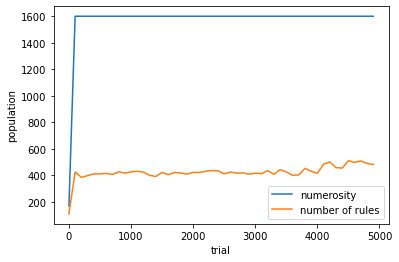

In [5]:
ax = df[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

plt.show()

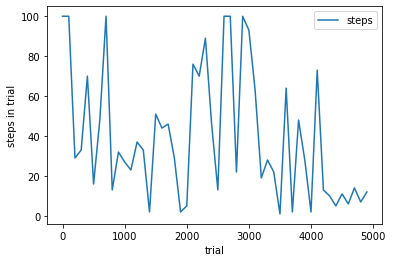

In [6]:
ax = df['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])

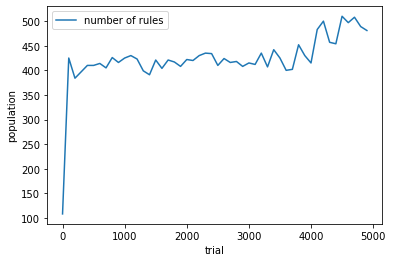

In [7]:
ax = df['population'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["number of rules"])

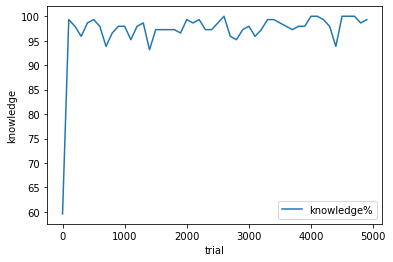

In [8]:
ax = df['knowledge'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge")
ax.legend(["knowledge%"])